In [2]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

In [3]:
data=pd.read_csv('C:/Users/User/machine_learning/data/btc_data.csv')
data.head(5)

Date  priceUSD  transactions     size  sentbyaddress  difficulty  \
0  2010/07/17    0.0495           235  649.653            390     181.543   
1  2010/07/18    0.0726           248  765.285            424     181.543   
2  2010/07/19    0.0859           354  756.040            553     181.543   
3  2010/07/20    0.0783           413  984.707            632     181.543   
4  2010/07/21    0.0767           256  542.483            440     181.543   

       hashrate  mining_profitability  sentinusdUSD  transactionfeesUSD  ...  \
0  2.775561e+09              154298.0        1193.0            0.000010  ...   
1  1.554461e+09              401834.0        2620.0            0.000243  ...   
2  1.551287e+09              481473.0        4048.0            0.000022  ...   
3  1.640430e+09              431831.0        2341.0            0.000000  ...   
4  1.723493e+09              460783.0        2122.0            0.000000  ...   

   price3rsiUSD  price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
0         0.000           0.0            0.0            0.0            0.0   
1         0.000           0.0            0.0            0.0            0.0   
2         0.000           0.0            0.0            0.0            0.0   
3        82.751           0.0            0.0            0.0            0.0   
4        78.603           0.0            0.0            0.0            0.0   

   price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
0         0.000           0.0            0.0            0.0            0.0  
1         0.000           0.0            0.0            0.0            0.0  
2         0.000           0.0            0.0            0.0            0.0  
3        58.099           0.0            0.0            0.0            0.0  
4         5.652           0.0            0.0            0.0            0.0  

[5 rows x 737 columns]

In [4]:
data.dtypes

Date              object
priceUSD         float64
transactions       int64
size             float64
sentbyaddress      int64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 737, dtype: object

In [5]:
data.isna().sum()

Date             0
priceUSD         0
transactions     0
size             0
sentbyaddress    0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 737, dtype: int64

In [6]:
data.fillna(0, inplace=True)

In [7]:
data["Date"][data["size"]>600]

0       2010/07/17
1       2010/07/18
2       2010/07/19
3       2010/07/20
7       2010/07/24
           ...    
3483    2020/01/29
3484    2020/01/30
3485    2020/01/31
3486    2020/02/01
3487    2020/02/02
Name: Date, Length: 3415, dtype: object

In [8]:
data["size"].max()

998092.0

In [9]:
data["transactions"].mean()

142945.7686353211

In [10]:
data.shape 

(3488, 737)

In [11]:
data.tail()

Date  priceUSD  transactions      size  sentbyaddress  \
3483  2020/01/29    9349.0        340402  706867.0         433958   
3484  2020/01/30    9394.0        332402  704883.0         416980   
3485  2020/01/31    9366.0        334290  770486.0         398021   
3486  2020/02/01    9393.0        303573  650769.0         338567   
3487  2020/02/02    9398.0        290736  684127.0         257655   

        difficulty      hashrate  mining_profitability  sentinusdUSD  \
3483  1.546610e+13  1.157542e+20                 0.163  8.336367e+09   
3484  1.546610e+13  1.253033e+20                 0.148  1.365361e+10   
3485  1.546610e+13  1.113635e+20                 0.153  1.126273e+10   
3486  1.546610e+13  1.201317e+20                 0.149  7.668679e+09   
3487  1.546610e+13  1.064910e+20                 0.159  6.486338e+09   

      transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  price14rsiUSD  \
3483               0.561  ...        93.577        80.644         73.588   
3484               0.555  ...        94.137        81.436         74.176   
3485               0.631  ...        87.140        79.116         73.100   
3486               0.541  ...        88.385        79.762         73.498   
3487               0.548  ...        88.689        79.897         73.576   

      price30rsiUSD  price90rsiUSD  price3rocUSD  price7rocUSD  price14rocUSD  \
3483         64.882         54.040        10.430         7.538          6.497   
3484         65.272         54.195         7.432        10.930          8.061   
3485         64.815         54.082         3.505        11.368          5.611   
3486         65.058         54.175         0.473        12.499          5.457   
3487         65.104         54.192         0.041        11.011          6.081   

      price30rocUSD  price90rocUSD  
3483         26.536          1.663  
3484         28.817          2.376  
3485         29.412          0.800  
3486         31.791          1.606  
3487         29.624          1.220  

[5 rows x 737 columns]

In [12]:
data.head()

Date  priceUSD  transactions     size  sentbyaddress  difficulty  \
0  2010/07/17    0.0495           235  649.653            390     181.543   
1  2010/07/18    0.0726           248  765.285            424     181.543   
2  2010/07/19    0.0859           354  756.040            553     181.543   
3  2010/07/20    0.0783           413  984.707            632     181.543   
4  2010/07/21    0.0767           256  542.483            440     181.543   

       hashrate  mining_profitability  sentinusdUSD  transactionfeesUSD  ...  \
0  2.775561e+09              154298.0        1193.0            0.000010  ...   
1  1.554461e+09              401834.0        2620.0            0.000243  ...   
2  1.551287e+09              481473.0        4048.0            0.000022  ...   
3  1.640430e+09              431831.0        2341.0            0.000000  ...   
4  1.723493e+09              460783.0        2122.0            0.000000  ...   

   price3rsiUSD  price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
0         0.000           0.0            0.0            0.0            0.0   
1         0.000           0.0            0.0            0.0            0.0   
2         0.000           0.0            0.0            0.0            0.0   
3        82.751           0.0            0.0            0.0            0.0   
4        78.603           0.0            0.0            0.0            0.0   

   price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
0         0.000           0.0            0.0            0.0            0.0  
1         0.000           0.0            0.0            0.0            0.0  
2         0.000           0.0            0.0            0.0            0.0  
3        58.099           0.0            0.0            0.0            0.0  
4         5.652           0.0            0.0            0.0            0.0  

[5 rows x 737 columns]

In [13]:
data.columns

Index(['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress',
       'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=737)

In [14]:
data.priceUSD

0          0.0495
1          0.0726
2          0.0859
3          0.0783
4          0.0767
          ...    
3483    9349.0000
3484    9394.0000
3485    9366.0000
3486    9393.0000
3487    9398.0000
Name: priceUSD, Length: 3488, dtype: float64

In [15]:
data[["transactions"]]

transactions
0              235
1              248
2              354
3              413
4              256
...            ...
3483        340402
3484        332402
3485        334290
3486        303573
3487        290736

[3488 rows x 1 columns]

In [16]:
data[["transactions", "difficulty", "size"]]

transactions    difficulty        size
0              235  1.815430e+02     649.653
1              248  1.815430e+02     765.285
2              354  1.815430e+02     756.040
3              413  1.815430e+02     984.707
4              256  1.815430e+02     542.483
...            ...           ...         ...
3483        340402  1.546610e+13  706867.000
3484        332402  1.546610e+13  704883.000
3485        334290  1.546610e+13  770486.000
3486        303573  1.546610e+13  650769.000
3487        290736  1.546610e+13  684127.000

[3488 rows x 3 columns]

In [17]:
data.describe()

priceUSD   transactions           size  sentbyaddress  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean    2221.595486  142945.768635  445366.777423  200961.965023   
std     3484.907470  119034.141872  349573.044109  165393.740993   
min        0.049500      92.000000     322.952000     226.000000   
25%       13.981750   36832.500000  105820.250000   32617.500000   
50%      422.276500  104517.500000  400855.000000  171124.000000   
75%     3601.000000  243813.000000  783783.250000  349257.750000   
max    19401.000000  490459.000000  998092.000000  730199.000000   

         difficulty      hashrate  mining_profitability  sentinusdUSD  \
count  3.488000e+03  3.488000e+03           3488.000000  3.488000e+03   
mean   1.714001e+12  1.271301e+19           6846.812455  3.492008e+09   
std    3.368823e+12  2.500857e+19          29226.418099  8.086236e+09   
min    1.815430e+02  1.551287e+09              0.111000  5.537050e+02   
25%    3.249550e+06  2.315803e+13              0.715000  3.236320e+07   
50%    4.761056e+10  3.455567e+17              2.787500  3.922260e+08   
75%    9.232331e+11  7.605864e+18           3101.000000  4.944641e+09   
max    1.546610e+13  1.261314e+20         481473.000000  2.506494e+11   

       transactionfeesUSD  median_transaction_feeUSD  ...  price3rsiUSD  \
count         3488.000000                3488.000000  ...   3488.000000   
mean             0.992210                   0.531247  ...     55.940820   
std              3.791891                   2.217152  ...     29.730782   
min              0.000000                   0.000000  ...      0.000000   
25%              0.022700                   0.006610  ...     31.178750   
50%              0.091650                   0.048050  ...     57.088500   
75%              0.538250                   0.158000  ...     83.127500   
max             55.160000                  34.095000  ...     99.996000   

       price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean      55.703403      55.446299      55.007025      53.802726   
std       22.708861      18.435782      14.958115      12.973238   
min        0.000000       0.000000       0.000000       0.000000   
25%       39.021500      42.334750      45.404250      47.388250   
50%       53.976000      53.467000      53.540500      53.794000   
75%       73.204250      68.129250      63.262000      60.222500   
max       99.752000      99.033000      98.043000      96.314000   

       price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
count   3488.000000   3488.000000    3488.000000    3488.000000     3488.00000  
mean       1.430000      3.513192       7.695209      20.272735       91.49006  
std        9.344068     16.484953      28.830382      67.103950      260.99824  
min      -52.688000    -61.595000     -52.299000     -60.273000      -83.16100  
25%       -2.275000     -3.795000      -6.314000      -9.865250      -12.27525  
50%        0.566500      1.062500       2.273000       3.828000       19.22200  
75%        4.303000      8.380500      13.728500      26.204250       90.99600  
max       88.853000    192.720000     263.208000     714.480000     3224.00000  

[8 rows x 736 columns]

In [18]:
data[data["size"]==data["size"].max()]

Date  priceUSD  transactions      size  sentbyaddress  \
2593  2017/08/22    3941.0        196194  998092.0         321776   

        difficulty      hashrate  mining_profitability  sentinusdUSD  \
2593  9.232331e+11  4.624293e+18                 1.233  7.259788e+09   

      transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  price14rsiUSD  \
2593               6.713  ...        18.755        51.665         64.085   

      price30rsiUSD  price90rsiUSD  price3rocUSD  price7rocUSD  price14rocUSD  \
2593         65.566         63.977        -3.643        -5.912         15.152   

      price30rocUSD  price90rocUSD  
2593         42.811         65.661  

[1 rows x 737 columns]

In [19]:
data[["Date", "size"]][data["size"]==data["size"].max()]

Date      size
2593  2017/08/22  998092.0

In [20]:
data.index

RangeIndex(start=0, stop=3488, step=1)

In [21]:
data.describe()

priceUSD   transactions           size  sentbyaddress  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean    2221.595486  142945.768635  445366.777423  200961.965023   
std     3484.907470  119034.141872  349573.044109  165393.740993   
min        0.049500      92.000000     322.952000     226.000000   
25%       13.981750   36832.500000  105820.250000   32617.500000   
50%      422.276500  104517.500000  400855.000000  171124.000000   
75%     3601.000000  243813.000000  783783.250000  349257.750000   
max    19401.000000  490459.000000  998092.000000  730199.000000   

         difficulty      hashrate  mining_profitability  sentinusdUSD  \
count  3.488000e+03  3.488000e+03           3488.000000  3.488000e+03   
mean   1.714001e+12  1.271301e+19           6846.812455  3.492008e+09   
std    3.368823e+12  2.500857e+19          29226.418099  8.086236e+09   
min    1.815430e+02  1.551287e+09              0.111000  5.537050e+02   
25%    3.249550e+06  2.315803e+13              0.715000  3.236320e+07   
50%    4.761056e+10  3.455567e+17              2.787500  3.922260e+08   
75%    9.232331e+11  7.605864e+18           3101.000000  4.944641e+09   
max    1.546610e+13  1.261314e+20         481473.000000  2.506494e+11   

       transactionfeesUSD  median_transaction_feeUSD  ...  price3rsiUSD  \
count         3488.000000                3488.000000  ...   3488.000000   
mean             0.992210                   0.531247  ...     55.940820   
std              3.791891                   2.217152  ...     29.730782   
min              0.000000                   0.000000  ...      0.000000   
25%              0.022700                   0.006610  ...     31.178750   
50%              0.091650                   0.048050  ...     57.088500   
75%              0.538250                   0.158000  ...     83.127500   
max             55.160000                  34.095000  ...     99.996000   

       price7rsiUSD  price14rsiUSD  price30rsiUSD  price90rsiUSD  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean      55.703403      55.446299      55.007025      53.802726   
std       22.708861      18.435782      14.958115      12.973238   
min        0.000000       0.000000       0.000000       0.000000   
25%       39.021500      42.334750      45.404250      47.388250   
50%       53.976000      53.467000      53.540500      53.794000   
75%       73.204250      68.129250      63.262000      60.222500   
max       99.752000      99.033000      98.043000      96.314000   

       price3rocUSD  price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
count   3488.000000   3488.000000    3488.000000    3488.000000     3488.00000  
mean       1.430000      3.513192       7.695209      20.272735       91.49006  
std        9.344068     16.484953      28.830382      67.103950      260.99824  
min      -52.688000    -61.595000     -52.299000     -60.273000      -83.16100  
25%       -2.275000     -3.795000      -6.314000      -9.865250      -12.27525  
50%        0.566500      1.062500       2.273000       3.828000       19.22200  
75%        4.303000      8.380500      13.728500      26.204250       90.99600  
max       88.853000    192.720000     263.208000     714.480000     3224.00000  

[8 rows x 736 columns]

In [22]:
data_set = data[['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress', 'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD', 'transactionfeesUSD', 'median_transaction_feeUSD', 'confirmationtime', 'transactionvalueUSD', 'mediantransactionvalueUSD', 'activeaddresses', 'top100cap', 'fee_to_rewardUSD']]
data_set.head()

Date  priceUSD  transactions     size  sentbyaddress  difficulty  \
0  2010/07/17    0.0495           235  649.653            390     181.543   
1  2010/07/18    0.0726           248  765.285            424     181.543   
2  2010/07/19    0.0859           354  756.040            553     181.543   
3  2010/07/20    0.0783           413  984.707            632     181.543   
4  2010/07/21    0.0767           256  542.483            440     181.543   

       hashrate  mining_profitability  sentinusdUSD  transactionfeesUSD  \
0  2.775561e+09              154298.0        1193.0            0.000010   
1  1.554461e+09              401834.0        2620.0            0.000243   
2  1.551287e+09              481473.0        4048.0            0.000022   
3  1.640430e+09              431831.0        2341.0            0.000000   
4  1.723493e+09              460783.0        2122.0            0.000000   

   median_transaction_feeUSD  confirmationtime  transactionvalueUSD  \
0                        0.0             8.324                2.924   
1                        0.0             8.372                6.237   
2                        0.0             8.276                7.666   
3                        0.0             7.956                3.940   
4                        0.0             6.957                4.583   

   mediantransactionvalueUSD  activeaddresses  top100cap  fee_to_rewardUSD  
0                      0.248              804     25.749           0.00100  
1                      0.363              917     25.782           0.01630  
2                      0.429              972     25.685           0.00154  
3                      5.105              906     25.602           0.00000  
4                      3.837              809     25.638           0.00000

In [23]:
data_set.describe()

priceUSD   transactions           size  sentbyaddress  \
count   3488.000000    3488.000000    3488.000000    3488.000000   
mean    2221.595486  142945.768635  445366.777423  200961.965023   
std     3484.907470  119034.141872  349573.044109  165393.740993   
min        0.049500      92.000000     322.952000     226.000000   
25%       13.981750   36832.500000  105820.250000   32617.500000   
50%      422.276500  104517.500000  400855.000000  171124.000000   
75%     3601.000000  243813.000000  783783.250000  349257.750000   
max    19401.000000  490459.000000  998092.000000  730199.000000   

         difficulty      hashrate  mining_profitability  sentinusdUSD  \
count  3.488000e+03  3.488000e+03           3488.000000  3.488000e+03   
mean   1.714001e+12  1.271301e+19           6846.812455  3.492008e+09   
std    3.368823e+12  2.500857e+19          29226.418099  8.086236e+09   
min    1.815430e+02  1.551287e+09              0.111000  5.537050e+02   
25%    3.249550e+06  2.315803e+13              0.715000  3.236320e+07   
50%    4.761056e+10  3.455567e+17              2.787500  3.922260e+08   
75%    9.232331e+11  7.605864e+18           3101.000000  4.944641e+09   
max    1.546610e+13  1.261314e+20         481473.000000  2.506494e+11   

       transactionfeesUSD  median_transaction_feeUSD  confirmationtime  \
count         3488.000000                3488.000000       3488.000000   
mean             0.992210                   0.531247          9.371486   
std              3.791891                   2.217152          1.326406   
min              0.000000                   0.000000          0.000000   
25%              0.022700                   0.006610          8.571000   
50%              0.091650                   0.048050          9.351000   
75%              0.538250                   0.158000         10.141000   
max             55.160000                  34.095000         18.000000   

       transactionvalueUSD  mediantransactionvalueUSD  activeaddresses  \
count           3488.00000                3488.000000     3.488000e+03   
mean           13701.60295                 213.635257     2.997298e+05   
std            26255.51690                 408.342414     2.582591e+05   
min                0.66200                   0.002740     0.000000e+00   
25%             1149.75000                  61.912000     4.347800e+04   
50%             4400.00000                 116.400500     2.259785e+05   
75%            18168.00000                 231.095000     5.317770e+05   
max           812025.00000                5417.000000     1.133157e+06   

         top100cap  fee_to_rewardUSD  
count  3488.000000       3488.000000  
mean     20.708165          2.419289  
std       4.370518          4.551132  
min       0.000000          0.000000  
25%      18.535750          0.284000  
50%      19.535000          0.799500  
75%      21.317500          1.846750  
max      33.357000         43.580000

In [24]:
prices = data_set['priceUSD'].values
print(prices)

[4.950e-02 7.260e-02 8.590e-02 ... 9.366e+03 9.393e+03 9.398e+03]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [26]:
print(len(prices))

seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(prices) - sequence_length):
    result.append(prices[index: index + sequence_length])
print(result)

3488
[array([0.0495, 0.0726, 0.0859, 0.0783, 0.0767, 0.0649, 0.0566, 0.0581,
       0.053 , 0.053 , 0.058 , 0.0595, 0.0648, 0.0663, 0.0664, 0.0611,
       0.0613, 0.06  , 0.0597, 0.0596, 0.0622, 0.0599, 0.06  , 0.066 ,
       0.069 , 0.0635, 0.069 , 0.0655, 0.0663, 0.0661, 0.0643, 0.0678,
       0.069 , 0.0673, 0.0661, 0.066 , 0.0655, 0.0655, 0.065 , 0.0656,
       0.0644, 0.0645, 0.0646, 0.0644, 0.0648, 0.0621, 0.0625, 0.0622,
       0.0609, 0.0618, 0.062 ]), array([0.0726, 0.0859, 0.0783, 0.0767, 0.0649, 0.0566, 0.0581, 0.053 ,
       0.053 , 0.058 , 0.0595, 0.0648, 0.0663, 0.0664, 0.0611, 0.0613,
       0.06  , 0.0597, 0.0596, 0.0622, 0.0599, 0.06  , 0.066 , 0.069 ,
       0.0635, 0.069 , 0.0655, 0.0663, 0.0661, 0.0643, 0.0678, 0.069 ,
       0.0673, 0.0661, 0.066 , 0.0655, 0.0655, 0.065 , 0.0656, 0.0644,
       0.0645, 0.0646, 0.0644, 0.0648, 0.0621, 0.0625, 0.0622, 0.0609,
       0.0618, 0.062 , 0.0622]), array([0.0859, 0.0783, 0.0767, 0.0649, 0.0566, 0.0581, 0.053 , 0.053 ,
     

In [27]:
def normalize(data):
    normalized_data = []
    for window in data:
        print(window[0])
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
        print(window)
    return np.array(normalized_data)

result = normalize(result)


0.0495
[0.0495 0.0726 0.0859 0.0783 0.0767 0.0649 0.0566 0.0581 0.053  0.053
 0.058  0.0595 0.0648 0.0663 0.0664 0.0611 0.0613 0.06   0.0597 0.0596
 0.0622 0.0599 0.06   0.066  0.069  0.0635 0.069  0.0655 0.0663 0.0661
 0.0643 0.0678 0.069  0.0673 0.0661 0.066  0.0655 0.0655 0.065  0.0656
 0.0644 0.0645 0.0646 0.0644 0.0648 0.0621 0.0625 0.0622 0.0609 0.0618
 0.062 ]
0.0726
[0.0726 0.0859 0.0783 0.0767 0.0649 0.0566 0.0581 0.053  0.053  0.058
 0.0595 0.0648 0.0663 0.0664 0.0611 0.0613 0.06   0.0597 0.0596 0.0622
 0.0599 0.06   0.066  0.069  0.0635 0.069  0.0655 0.0663 0.0661 0.0643
 0.0678 0.069  0.0673 0.0661 0.066  0.0655 0.0655 0.065  0.0656 0.0644
 0.0645 0.0646 0.0644 0.0648 0.0621 0.0625 0.0622 0.0609 0.0618 0.062
 0.0622]
0.0859
[0.0859 0.0783 0.0767 0.0649 0.0566 0.0581 0.053  0.053  0.058  0.0595
 0.0648 0.0663 0.0664 0.0611 0.0613 0.06   0.0597 0.0596 0.0622 0.0599
 0.06   0.066  0.069  0.0635 0.069  0.0655 0.0663 0.0661 0.0643 0.0678
 0.069  0.0673 0.0661 0.066  0.0655 0.065

 26.434]
1.31
[ 1.31   1.546  1.716  1.595  1.687  1.841  2.046  2.546  3.215  3.267
  3.149  3.305  3.441  3.367  3.393  3.546  3.753  3.835  4.81   5.65
  5.895  7.259  7.659  6.995  7.512  7.62   7.036  6.756  6.198  5.96
  6.415  6.92   7.285  7.945  8.524  8.6    8.425  8.35   8.624  8.771
  9.156 10.1   12.445 16.501 17.833 17.625 21.092 26.8   29.415 26.434
 19.301]
1.546
[ 1.546  1.716  1.595  1.687  1.841  2.046  2.546  3.215  3.267  3.149
  3.305  3.441  3.367  3.393  3.546  3.753  3.835  4.81   5.65   5.895
  7.259  7.659  6.995  7.512  7.62   7.036  6.756  6.198  5.96   6.415
  6.92   7.285  7.945  8.524  8.6    8.425  8.35   8.624  8.771  9.156
 10.1   12.445 16.501 17.833 17.625 21.092 26.8   29.415 26.434 19.301
 16.648]
1.716
[ 1.716  1.595  1.687  1.841  2.046  2.546  3.215  3.267  3.149  3.305
  3.441  3.367  3.393  3.546  3.753  3.835  4.81   5.65   5.895  7.259
  7.659  6.995  7.512  7.62   7.036  6.756  6.198  5.96   6.415  6.92
  7.285  7.945  8.524  8.6    8.425 

  9.462]
17.0
[17.    17.    16.98  16.6   16.85  16.9   16.473 15.736 15.385 15.42
 14.65  13.392 13.853 14.737 14.545 14.347 14.638 14.555 14.109 13.989
 13.985 13.905 13.765 13.44  13.32  13.66  13.787 13.665 13.653 13.69
 13.835 14.014 13.956 13.911 13.691 13.494 13.516 13.443 13.222 12.573
 10.655 10.019 10.255  8.145  7.218  7.85   8.895  9.975  9.775  9.462
  9.801]
17.0
[17.    16.98  16.6   16.85  16.9   16.473 15.736 15.385 15.42  14.65
 13.392 13.853 14.737 14.545 14.347 14.638 14.555 14.109 13.989 13.985
 13.905 13.765 13.44  13.32  13.66  13.787 13.665 13.653 13.69  13.835
 14.014 13.956 13.911 13.691 13.494 13.516 13.443 13.222 12.573 10.655
 10.019 10.255  8.145  7.218  7.85   8.895  9.975  9.775  9.462  9.801
 10.463]
16.98
[16.98  16.6   16.85  16.9   16.473 15.736 15.385 15.42  14.65  13.392
 13.853 14.737 14.545 14.347 14.638 14.555 14.109 13.989 13.985 13.905
 13.765 13.44  13.32  13.66  13.787 13.665 13.653 13.69  13.835 14.014
 13.956 13.911 13.691 13.494 13.516 1

 5.109 5.112 5.104]
4.85
[4.85  4.878 4.963 4.93  4.922 4.934 4.819 4.74  4.831 4.854 4.882 4.924
 4.916 4.95  4.964 4.951 4.968 5.047 5.128 5.244 5.329 5.232 5.082 5.029
 5.116 5.115 5.104 5.04  4.942 4.931 4.975 5.037 5.104 5.088 5.072 5.064
 5.055 5.069 5.047 4.955 4.905 4.948 4.94  4.978 5.029 5.063 5.094 5.109
 5.112 5.104 5.1  ]
4.878
[4.878 4.963 4.93  4.922 4.934 4.819 4.74  4.831 4.854 4.882 4.924 4.916
 4.95  4.964 4.951 4.968 5.047 5.128 5.244 5.329 5.232 5.082 5.029 5.116
 5.115 5.104 5.04  4.942 4.931 4.975 5.037 5.104 5.088 5.072 5.064 5.055
 5.069 5.047 4.955 4.905 4.948 4.94  4.978 5.029 5.063 5.094 5.109 5.112
 5.104 5.1   5.099]
4.963
[4.963 4.93  4.922 4.934 4.819 4.74  4.831 4.854 4.882 4.924 4.916 4.95
 4.964 4.951 4.968 5.047 5.128 5.244 5.329 5.232 5.082 5.029 5.116 5.115
 5.104 5.04  4.942 4.931 4.975 5.037 5.104 5.088 5.072 5.064 5.055 5.069
 5.047 4.955 4.905 4.948 4.94  4.978 5.029 5.063 5.094 5.109 5.112 5.104
 5.1   5.099 5.119]
4.93
[4.93  4.922 4.934 4.81

 6.659 6.731 6.781]
5.104
[5.104 5.1   5.099 5.119 5.129 5.132 5.109 5.121 5.133 5.145 5.142 5.158
 5.237 5.262 5.227 5.243 5.353 5.45  5.529 5.612 5.596 5.514 5.522 5.648
 5.829 5.941 6.227 6.45  6.306 6.255 6.404 6.584 6.675 6.614 6.488 6.389
 6.327 6.375 6.553 6.626 6.628 6.67  6.659 6.68  6.605 6.48  6.59  6.659
 6.731 6.781 6.907]
5.1
[5.1   5.099 5.119 5.129 5.132 5.109 5.121 5.133 5.145 5.142 5.158 5.237
 5.262 5.227 5.243 5.353 5.45  5.529 5.612 5.596 5.514 5.522 5.648 5.829
 5.941 6.227 6.45  6.306 6.255 6.404 6.584 6.675 6.614 6.488 6.389 6.327
 6.375 6.553 6.626 6.628 6.67  6.659 6.68  6.605 6.48  6.59  6.659 6.731
 6.781 6.907 7.111]
5.099
[5.099 5.119 5.129 5.132 5.109 5.121 5.133 5.145 5.142 5.158 5.237 5.262
 5.227 5.243 5.353 5.45  5.529 5.612 5.596 5.514 5.522 5.648 5.829 5.941
 6.227 6.45  6.306 6.255 6.404 6.584 6.675 6.614 6.488 6.389 6.327 6.375
 6.553 6.626 6.628 6.67  6.659 6.68  6.605 6.48  6.59  6.659 6.731 6.781
 6.907 7.111 7.175]
5.119
[5.119 5.129 5.132 5.1

23.705
[ 23.705  24.107  24.252  25.164  26.364  26.544  26.545  26.525  27.694
  28.941  29.279  29.255  29.01   28.771  28.8    29.141  29.849  31.366
  33.236  33.118  32.458  33.353  36.627  38.99   39.99   41.29   43.161
  44.418  45.12   44.108  42.786  43.303  43.596  44.159  43.931  46.26
  51.382  57.752  63.989  65.74   63.616  64.77   69.145  71.704  79.237
  85.752  86.591  87.454  89.05   94.715 107.749]
24.107
[ 24.107  24.252  25.164  26.364  26.544  26.545  26.525  27.694  28.941
  29.279  29.255  29.01   28.771  28.8    29.141  29.849  31.366  33.236
  33.118  32.458  33.353  36.627  38.99   39.99   41.29   43.161  44.418
  45.12   44.108  42.786  43.303  43.596  44.159  43.931  46.26   51.382
  57.752  63.989  65.74   63.616  64.77   69.145  71.704  79.237  85.752
  86.591  87.454  89.05   94.715 107.749 120.003]
24.252
[ 24.252  25.164  26.364  26.544  26.545  26.525  27.694  28.941  29.279
  29.255  29.01   28.771  28.8    29.141  29.849  31.366  33.236  33.118
  32

134.114
[134.114 142.08  163.561 195.397 178.5   115.     92.446  98.435  91.849
  87.108  75.043  77.734  94.679 106.7   114.48  114.295 113.535 120.78
 134.8   139.74  132.945 126.316 124.045 130.56  134.465 124.662 111.049
 102.694 105.04  113.464 113.005 110.375 109.595 108.42  110.54  112.503
 111.738 112.241 108.635 104.575 107.    110.492 112.815 112.905 113.2
 115.28  116.686 118.696 124.605 127.725 128.75 ]
142.08
[142.08  163.561 195.397 178.5   115.     92.446  98.435  91.849  87.108
  75.043  77.734  94.679 106.7   114.48  114.295 113.535 120.78  134.8
 139.74  132.945 126.316 124.045 130.56  134.465 124.662 111.049 102.694
 105.04  113.464 113.005 110.375 109.595 108.42  110.54  112.503 111.738
 112.241 108.635 104.575 107.    110.492 112.815 112.905 113.2   115.28
 116.686 118.696 124.605 127.725 128.75  128.355]
163.561
[163.561 195.397 178.5   115.     92.446  98.435  91.849  87.108  75.043
  77.734  94.679 106.7   114.48  114.295 113.535 120.78  134.8   139.74
 132.945

793.629
[793.629 834.69  877.685 961.717 914.81  848.331 849.84  846.22  899.476
 893.878 837.415 844.33  857.806 854.108 822.71  836.905 842.293 886.057
 863.039 852.448 837.897 808.157 829.446 861.16  859.05  798.213 825.551
 812.648 824.542 838.57  835.689 816.934 817.692 830.298 800.337 727.901
 696.661 676.229 659.682 661.433 634.091 574.95  547.519 587.908 633.999
 630.288 628.232 622.409 597.613 565.081 578.305]
834.69
[834.69  877.685 961.717 914.81  848.331 849.84  846.22  899.476 893.878
 837.415 844.33  857.806 854.108 822.71  836.905 842.293 886.057 863.039
 852.448 837.897 808.157 829.446 861.16  859.05  798.213 825.551 812.648
 824.542 838.57  835.689 816.934 817.692 830.298 800.337 727.901 696.661
 676.229 659.682 661.433 634.091 574.95  547.519 587.908 633.999 630.288
 628.232 622.409 597.613 565.081 578.305 618.523]
877.685
[877.685 961.717 914.81  848.331 849.84  846.22  899.476 893.878 837.415
 844.33  857.806 854.108 822.71  836.905 842.293 886.057 863.039 852.448
 

 505.461 485.296 490.961 501.271 498.97  491.704]
677.606
[677.606 662.002 661.353 642.185 619.677 627.479 630.301 625.927 636.984
 638.79  632.924 631.464 631.648 625.026 613.511 613.783 596.009 582.231
 563.348 564.372 563.641 577.854 579.582 543.197 502.664 499.324 469.428
 457.005 476.297 466.322 434.951 444.394 451.812 459.325 454.031 451.41
 447.11  407.703 403.328 425.31  415.876 445.898 487.666 517.354 505.461
 485.296 490.961 501.271 498.97  491.704 486.543]
662.002
[662.002 661.353 642.185 619.677 627.479 630.301 625.927 636.984 638.79
 632.924 631.464 631.648 625.026 613.511 613.783 596.009 582.231 563.348
 564.372 563.641 577.854 579.582 543.197 502.664 499.324 469.428 457.005
 476.297 466.322 434.951 444.394 451.812 459.325 454.031 451.41  447.11
 407.703 403.328 425.31  415.876 445.898 487.666 517.354 505.461 485.296
 490.961 501.271 498.97  491.704 486.543 487.399]
661.353
[661.353 642.185 619.677 627.479 630.301 625.927 636.984 638.79  632.924
 631.464 631.648 625.026 6

[323.943 328.083 332.744 329.188 319.032 323.135 318.737 315.441 314.822
 311.944 312.724 315.626 314.346 303.591 274.82  272.076 276.104 287.178
 287.542 283.794 280.21  273.146 269.036 239.441 197.577 205.937 211.756
 200.604 205.929 211.824 210.64  214.636 232.311 229.752 237.146 248.51
 281.323 261.244 252.788 232.4   232.471 227.909 218.482 226.795 236.83
 225.308 222.448 219.936 225.863 224.9   220.946]
328.083
[328.083 332.744 329.188 319.032 323.135 318.737 315.441 314.822 311.944
 312.724 315.626 314.346 303.591 274.82  272.076 276.104 287.178 287.542
 283.794 280.21  273.146 269.036 239.441 197.577 205.937 211.756 200.604
 205.929 211.824 210.64  214.636 232.311 229.752 237.146 248.51  281.323
 261.244 252.788 232.4   232.471 227.909 218.482 226.795 236.83  225.308
 222.448 219.936 225.863 224.9   220.946 218.176]
332.744
[332.744 329.188 319.032 323.135 318.737 315.441 314.822 311.944 312.724
 315.626 314.346 303.591 274.82  272.076 276.104 287.178 287.542 283.794
 280.21  2

 273.617 257.124 260.716 259.368 261.797 267.213]
226.795
[226.795 236.83  225.308 222.448 219.936 225.863 224.9   220.946 218.176
 220.585 219.338 231.691 246.158 250.235 234.532 238.71  239.529 237.832
 242.991 244.115 241.202 236.119 238.067 237.006 235.973 250.348 252.709
 251.478 262.486 275.364 278.934 270.497 272.846 273.282 275.227 281.962
 293.828 293.97  294.297 291.01  283.365 283.896 290.818 288.825 273.617
 257.124 260.716 259.368 261.797 267.213 256.186]
236.83
[236.83  225.308 222.448 219.936 225.863 224.9   220.946 218.176 220.585
 219.338 231.691 246.158 250.235 234.532 238.71  239.529 237.832 242.991
 244.115 241.202 236.119 238.067 237.006 235.973 250.348 252.709 251.478
 262.486 275.364 278.934 270.497 272.846 273.282 275.227 281.962 293.828
 293.97  294.297 291.01  283.365 283.896 290.818 288.825 273.617 257.124
 260.716 259.368 261.797 267.213 256.186 244.675]
225.308
[225.308 222.448 219.936 225.863 224.9   220.946 218.176 220.585 219.338
 231.691 246.158 250.235

 433.24  429.271 431.819 432.241 429.829 447.946]
330.832
[330.832 319.889 324.813 324.123 322.867 320.608 322.364 342.484 355.977
 354.843 360.479 376.271 367.19  355.655 361.925 359.977 374.789 393.696
 393.935 395.33  417.576 415.562 432.058 432.019 435.76  441.485 456.742
 456.521 455.108 459.385 462.587 453.641 437.468 439.047 440.857 454.111
 454.511 428.423 417.265 424.113 425.095 428.988 425.418 432.258 433.24
 429.271 431.819 432.241 429.829 447.946 454.849]
319.889
[319.889 324.813 324.123 322.867 320.608 322.364 342.484 355.977 354.843
 360.479 376.271 367.19  355.655 361.925 359.977 374.789 393.696 393.935
 395.33  417.576 415.562 432.058 432.019 435.76  441.485 456.742 456.521
 455.108 459.385 462.587 453.641 437.468 439.047 440.857 454.111 454.511
 428.423 417.265 424.113 425.095 428.988 425.418 432.258 433.24  429.271
 431.819 432.241 429.829 447.946 454.849 449.909]
324.813
[324.813 324.123 322.867 320.608 322.364 342.484 355.977 354.843 360.479
 376.271 367.19  355.655

 429.127 436.765 434.676 431.575 421.323 419.557]
403.973
[403.973 371.323 384.435 383.    383.472 392.939 414.174 393.566 388.784
 396.316 396.252 393.133 394.257 383.843 375.988 378.256 377.724 373.237
 374.287 372.194 378.35  387.86  377.282 377.566 376.95  374.584 379.689
 380.995 382.955 389.825 400.002 404.62  404.798 414.783 420.743 420.701
 430.082 438.567 437.065 427.514 421.19  423.3   424.262 432.256 429.127
 436.765 434.676 431.575 421.323 419.557 403.989]
371.323
[371.323 384.435 383.    383.472 392.939 414.174 393.566 388.784 396.316
 396.252 393.133 394.257 383.843 375.988 378.256 377.724 373.237 374.287
 372.194 378.35  387.86  377.282 377.566 376.95  374.584 379.689 380.995
 382.955 389.825 400.002 404.62  404.798 414.783 420.743 420.701 430.082
 438.567 437.065 427.514 421.19  423.3   424.262 432.256 429.127 436.765
 434.676 431.575 421.323 419.557 403.989 404.42 ]
384.435
[384.435 383.    383.472 392.939 414.174 393.566 388.784 396.316 396.252
 393.133 394.257 383.84

 732.374 737.759 747.59  767.657 764.483 764.011]
639.793
[639.793 638.715 637.034 632.653 628.962 631.236 641.524 653.664 650.557
 654.64  665.07  682.275 685.356 705.335 704.786 698.831 720.121 724.827
 724.099 698.792 702.682 708.671 703.872 705.761 724.306 714.235 714.44
 708.542 696.136 701.676 709.94  721.652 742.568 742.522 747.646 740.325
 734.423 741.868 742.446 738.491 734.983 734.786 732.631 732.658 732.374
 737.759 747.59  767.657 764.483 764.011 754.931]
638.715
[638.715 637.034 632.653 628.962 631.236 641.524 653.664 650.557 654.64
 665.07  682.275 685.356 705.335 704.786 698.831 720.121 724.827 724.099
 698.792 702.682 708.671 703.872 705.761 724.306 714.235 714.44  708.542
 696.136 701.676 709.94  721.652 742.568 742.522 747.646 740.325 734.423
 741.868 742.446 738.491 734.983 734.786 732.631 732.658 732.374 737.759
 747.59  767.657 764.483 764.011 754.931 755.702]
637.034
[637.034 632.653 628.962 631.236 641.524 653.664 650.557 654.64  665.07
 682.275 685.356 705.335 7

754.931
[ 754.931  755.702  760.565  766.652  768.494  771.991  767.304  774.371
  777.648  776.714  776.708  779.035  786.632  787.662  789.416  789.909
  811.021  852.382  894.707  897.765  871.821  896.85   911.027  950.293
  965.624  950.955  952.778  970.988 1010.    1017.    1075.    1045.
  927.984  865.388  908.784  890.728  899.089  843.358  781.292  805.197
  825.581  816.142  825.861  873.162  882.986  890.236  892.331  914.851
  920.879  918.084  906.179]
755.702
[ 755.702  760.565  766.652  768.494  771.991  767.304  774.371  777.648
  776.714  776.708  779.035  786.632  787.662  789.416  789.909  811.021
  852.382  894.707  897.765  871.821  896.85   911.027  950.293  965.624
  950.955  952.778  970.988 1010.    1017.    1075.    1045.     927.984
  865.388  908.784  890.728  899.089  843.358  781.292  805.197  825.581
  816.142  825.861  873.162  882.986  890.236  892.331  914.851  920.879
  918.084  906.179  894.156]
760.565
[ 760.565  766.652  768.494  771.991  767.304

 5611. 5677. 5632.]
4349.0
[4349. 4316. 4473. 4586. 4677. 4808. 4694. 4601. 4402. 4290. 4564. 4613.
 4509. 4327. 4224. 4239. 4271. 3956. 3648. 3430. 3733. 3669. 3962. 3978.
 3958. 3811. 3645. 3735. 3713. 3832. 3928. 4045. 4200. 4156. 4290. 4323.
 4421. 4326. 4263. 4268. 4372. 4364. 4508. 4655. 4825. 4796. 5076. 5611.
 5677. 5632. 5680.]
4316.0
[4316. 4473. 4586. 4677. 4808. 4694. 4601. 4402. 4290. 4564. 4613. 4509.
 4327. 4224. 4239. 4271. 3956. 3648. 3430. 3733. 3669. 3962. 3978. 3958.
 3811. 3645. 3735. 3713. 3832. 3928. 4045. 4200. 4156. 4290. 4323. 4421.
 4326. 4263. 4268. 4372. 4364. 4508. 4655. 4825. 4796. 5076. 5611. 5677.
 5632. 5680. 5633.]
4473.0
[4473. 4586. 4677. 4808. 4694. 4601. 4402. 4290. 4564. 4613. 4509. 4327.
 4224. 4239. 4271. 3956. 3648. 3430. 3733. 3669. 3962. 3978. 3958. 3811.
 3645. 3735. 3713. 3832. 3928. 4045. 4200. 4156. 4290. 4323. 4421. 4326.
 4263. 4268. 4372. 4364. 4508. 4655. 4825. 4796. 5076. 5611. 5677. 5632.
 5680. 5633. 5398.]
4586.0
[4586. 4677. 480

 16561.]
5877.0
[ 5877.  5662.  5546.  5824.  5824.  5755.  5882.  6122.  6244.  6507.
  6963.  7240.  7264.  7472.  7254.  7113.  7383.  7250.  6951.  6549.
  6115.  6345.  6601.  7074.  7462.  7840.  7705.  7832.  8112.  8178.
  8206.  8184.  8168.  8464.  9041.  9607.  9867. 10480.  9996. 10236.
 10976. 11320. 11414. 11716. 12656. 15282. 16326. 15335. 14558. 16561.
 16914.]
5662.0
[ 5662.  5546.  5824.  5824.  5755.  5882.  6122.  6244.  6507.  6963.
  7240.  7264.  7472.  7254.  7113.  7383.  7250.  6951.  6549.  6115.
  6345.  6601.  7074.  7462.  7840.  7705.  7832.  8112.  8178.  8206.
  8184.  8168.  8464.  9041.  9607.  9867. 10480.  9996. 10236. 10976.
 11320. 11414. 11716. 12656. 15282. 16326. 15335. 14558. 16561. 16914.
 16746.]
5546.0
[ 5546.  5824.  5824.  5755.  5882.  6122.  6244.  6507.  6963.  7240.
  7264.  7472.  7254.  7113.  7383.  7250.  6951.  6549.  6115.  6345.
  6601.  7074.  7462.  7840.  7705.  7832.  8112.  8178.  8206.  8184.
  8168.  8464.  9041.  9607. 

 6463. 6380. 6308.]
7455.0
[7455. 7681. 8068. 8254. 8199. 8021. 8180. 8206. 8142. 7929. 7580. 7598.
 7403. 7260. 7009. 7006. 7000. 6454. 6398. 6414. 6195. 6316. 6356. 6064.
 6377. 6351. 6474. 6459. 6412. 6462. 6411. 6592. 6445. 6566. 6731. 6691.
 6733. 6997. 7067. 6947. 6994. 7114. 7249. 7269. 7332. 7145. 6442. 6463.
 6380. 6308. 6307.]
7681.0
[7681. 8068. 8254. 8199. 8021. 8180. 8206. 8142. 7929. 7580. 7598. 7403.
 7260. 7009. 7006. 7000. 6454. 6398. 6414. 6195. 6316. 6356. 6064. 6377.
 6351. 6474. 6459. 6412. 6462. 6411. 6592. 6445. 6566. 6731. 6691. 6733.
 6997. 7067. 6947. 6994. 7114. 7249. 7269. 7332. 7145. 6442. 6463. 6380.
 6308. 6307. 6312.]
8068.0
[8068. 8254. 8199. 8021. 8180. 8206. 8142. 7929. 7580. 7598. 7403. 7260.
 7009. 7006. 7000. 6454. 6398. 6414. 6195. 6316. 6356. 6064. 6377. 6351.
 6474. 6459. 6412. 6462. 6411. 6592. 6445. 6566. 6731. 6691. 6733. 6997.
 7067. 6947. 6994. 7114. 7249. 7269. 7332. 7145. 6442. 6463. 6380. 6308.
 6307. 6312. 6287.]
8254.0
[8254. 8199. 802

 6385. 6414. 6451.]
6408.0
[6408. 6307. 6352. 6423. 6667. 6714. 6712. 6645. 6424. 6470. 6528. 6683.
 6568. 6610. 6610. 6579. 6484. 6583. 6584. 6598. 6580. 6630. 6639. 6581.
 6284. 6278. 6288. 6335. 6614. 6642. 6609. 6595. 6514. 6526. 6574. 6537.
 6511. 6530. 6502. 6493. 6491. 6483. 6406. 6331. 6330. 6361. 6410. 6385.
 6414. 6451. 6454.]
6307.0
[6307. 6352. 6423. 6667. 6714. 6712. 6645. 6424. 6470. 6528. 6683. 6568.
 6610. 6610. 6579. 6484. 6583. 6584. 6598. 6580. 6630. 6639. 6581. 6284.
 6278. 6288. 6335. 6614. 6642. 6609. 6595. 6514. 6526. 6574. 6537. 6511.
 6530. 6502. 6493. 6491. 6483. 6406. 6331. 6330. 6361. 6410. 6385. 6414.
 6451. 6454. 6547.]
6352.0
[6352. 6423. 6667. 6714. 6712. 6645. 6424. 6470. 6528. 6683. 6568. 6610.
 6610. 6579. 6484. 6583. 6584. 6598. 6580. 6630. 6639. 6581. 6284. 6278.
 6288. 6335. 6614. 6642. 6609. 6595. 6514. 6526. 6574. 6537. 6511. 6530.
 6502. 6493. 6491. 6483. 6406. 6331. 6330. 6361. 6410. 6385. 6414. 6451.
 6454. 6547. 6503.]
6423.0
[6423. 6667. 671

 10482.]
8337.0
[ 8337.  8713.  9081.  9225.  9161.  9150.  9339.  9796. 10733. 10780.
 10865. 11320. 12668. 11826. 11702. 11867. 11569. 10709. 10323. 11337.
 11752. 11141. 11383. 11297. 11763. 12497. 12645. 11589. 11583. 11424.
 10868. 10433. 10364.  9580. 10053. 10469. 10672. 10579. 10458. 10082.
  9714. 10028.  9782.  9734.  9499.  9556.  9547.  9850. 10083. 10482.
 10790.]
8713.0
[ 8713.  9081.  9225.  9161.  9150.  9339.  9796. 10733. 10780. 10865.
 11320. 12668. 11826. 11702. 11867. 11569. 10709. 10323. 11337. 11752.
 11141. 11383. 11297. 11763. 12497. 12645. 11589. 11583. 11424. 10868.
 10433. 10364.  9580. 10053. 10469. 10672. 10579. 10458. 10082.  9714.
 10028.  9782.  9734.  9499.  9556.  9547.  9850. 10083. 10482. 10790.
 10814.]
9081.0
[ 9081.  9225.  9161.  9150.  9339.  9796. 10733. 10780. 10865. 11320.
 12668. 11826. 11702. 11867. 11569. 10709. 10323. 11337. 11752. 11141.
 11383. 11297. 11763. 12497. 12645. 11589. 11583. 11424. 10868. 10433.
 10364.  9580. 10053. 10469. 

  9909.]
11680.0
[11680. 11772. 11726. 11811. 11837. 11602. 11403. 11404. 11161. 10494.
 10035. 10245. 10309. 10295. 10614. 10758. 10219. 10058. 10266. 10156.
 10104. 10349. 10191. 10085.  9533.  9556.  9608.  9636.  9934. 10517.
 10566. 10575. 10655. 10426. 10467. 10319. 10243. 10082. 10237. 10328.
 10351. 10334. 10287. 10237. 10211. 10007. 10192. 10058. 10005.  9909.
  9469.]
11772.0
[11772. 11726. 11811. 11837. 11602. 11403. 11404. 11161. 10494. 10035.
 10245. 10309. 10295. 10614. 10758. 10219. 10058. 10266. 10156. 10104.
 10349. 10191. 10085.  9533.  9556.  9608.  9636.  9934. 10517. 10566.
 10575. 10655. 10426. 10467. 10319. 10243. 10082. 10237. 10328. 10351.
 10334. 10287. 10237. 10211. 10007. 10192. 10058. 10005.  9909.  9469.
  8465.]
11726.0
[11726. 11811. 11837. 11602. 11403. 11404. 11161. 10494. 10035. 10245.
 10309. 10295. 10614. 10758. 10219. 10058. 10266. 10156. 10104. 10349.
 10191. 10085.  9533.  9556.  9608.  9636.  9934. 10517. 10566. 10575.
 10655. 10426. 10467. 1031

In [28]:
# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape, y_test.shape

((3093, 50, 1), (344, 50, 1), (344,))

In [29]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [30]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20,
    callbacks=[
        TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')
])

Epoch 1/20
  1/310 [..............................] - ETA: 0s - loss: 1.0828WARNING:tensorflow:From C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
307/310 [============================>.] - ETA: 0s - loss: 0.6190
Epoch 00001: val_loss improved from inf to 0.01179, saving model to ./models\2021_05_20_13_37_46_eth.h5
310/310 [==============================] - 5s 17ms/step - loss: 0.6146 - val_loss: 0.0118
Epoch 2/20
310/310 [==============================] - ETA: 0s - loss: 0.2842
Epoch 00002: val_loss improved from 0.01179 to 0.00474, saving model to ./models\2021_05_20_13_37_46_eth.h5
310/310 [==============================] - 5s 15ms/step - loss: 0.2842 - val_loss: 0.0047
Epoch 3/20
309/310 [============================>.] - ETA: 0s - loss: 0.2087
Epoch 00003: val_loss did not i

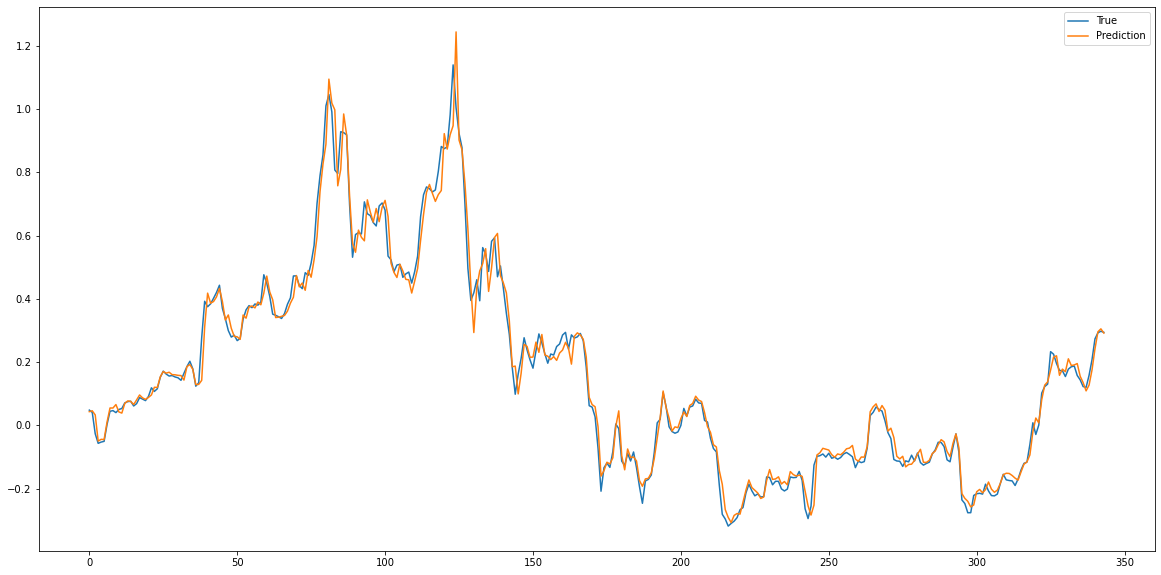

In [31]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [32]:
data.tail()

Date  priceUSD  transactions      size  sentbyaddress  \
3483  2020/01/29    9349.0        340402  706867.0         433958   
3484  2020/01/30    9394.0        332402  704883.0         416980   
3485  2020/01/31    9366.0        334290  770486.0         398021   
3486  2020/02/01    9393.0        303573  650769.0         338567   
3487  2020/02/02    9398.0        290736  684127.0         257655   

        difficulty      hashrate  mining_profitability  sentinusdUSD  \
3483  1.546610e+13  1.157542e+20                 0.163  8.336367e+09   
3484  1.546610e+13  1.253033e+20                 0.148  1.365361e+10   
3485  1.546610e+13  1.113635e+20                 0.153  1.126273e+10   
3486  1.546610e+13  1.201317e+20                 0.149  7.668679e+09   
3487  1.546610e+13  1.064910e+20                 0.159  6.486338e+09   

      transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  price14rsiUSD  \
3483               0.561  ...        93.577        80.644         73.588   
3484               0.555  ...        94.137        81.436         74.176   
3485               0.631  ...        87.140        79.116         73.100   
3486               0.541  ...        88.385        79.762         73.498   
3487               0.548  ...        88.689        79.897         73.576   

      price30rsiUSD  price90rsiUSD  price3rocUSD  price7rocUSD  price14rocUSD  \
3483         64.882         54.040        10.430         7.538          6.497   
3484         65.272         54.195         7.432        10.930          8.061   
3485         64.815         54.082         3.505        11.368          5.611   
3486         65.058         54.175         0.473        12.499          5.457   
3487         65.104         54.192         0.041        11.011          6.081   

      price30rocUSD  price90rocUSD  
3483         26.536          1.663  
3484         28.817          2.376  
3485         29.412          0.800  
3486         31.791          1.606  
3487         29.624          1.220  

[5 rows x 737 columns]

In [33]:
data_test=pd.read_csv('C:/Users/User/machine_learning/data/btc_testdata.csv')
data_test.head(5)

Date    Open*     High      Low  Close**        Volume    Market Cap
0  03-Feb-20  9344.68  9540.37  9248.63  9293.52  3.093410e+10  1.691269e+11
1  04-Feb-20  9292.84  9331.27  9112.81  9180.96  2.989318e+10  1.670936e+11
2  05-Feb-20  9183.42  9701.30  9163.70  9613.42  3.522206e+10  1.749834e+11
3  06-Feb-20  9617.82  9824.62  9539.82  9729.80  3.762882e+10  1.771183e+11
4  07-Feb-20  9726.00  9834.72  9726.00  9795.94  3.452272e+10  1.783394e+11

In [34]:
high_prices = data_test['High'].values
low_prices = data_test['Low'].values
mid_prices = (high_prices + low_prices) / 2
print(mid_prices)

[ 9394.5    9222.04   9432.5    9682.22   9780.36   9777.83   9989.915
  9975.165  9969.69  10298.    10286.895 10223.765 10107.995  9888.18
  9723.23   9897.16   9901.45   9575.56   9656.375  9649.48   9797.595
  9744.395  9478.88   9029.605  8755.045  8691.695  8687.57   8599.005
  8726.97   8803.295  8777.9    8949.65   9099.89   9026.98   8509.795
  7933.945  7975.855  7796.81   6394.735  4972.545  5375.15   5502.965
  4980.295  5176.63   5200.585  5783.355  6355.02   6155.48   6091.705
  6114.465  6600.045  6714.72   6663.21   6630.27   6292.67   6085.28
  6210.215  6439.34   6407.47   6842.085  6838.28   6787.715  6799.67
  7027.335  7282.325  7254.765  7260.27   7053.145  6857.995  6965.515
  6816.94   6876.19   6781.03   6844.975  7108.755  7179.605  7223.785
  7037.895  6884.495  7006.825  7286.685  7504.19   7581.515  7631.
  7737.51   7772.67   8328.9    8986.955  8857.89   8909.28   8999.375
  8800.965  8959.62   9189.09   9565.49   9881.955  9747.25   8995.345
  8703.895  

In [35]:
test_result = []
for index in range(len(mid_prices) - sequence_length):
    test_result.append(mid_prices[index: index + sequence_length])
print(test_result)

[array([ 9394.5  ,  9222.04 ,  9432.5  ,  9682.22 ,  9780.36 ,  9777.83 ,
        9989.915,  9975.165,  9969.69 , 10298.   , 10286.895, 10223.765,
       10107.995,  9888.18 ,  9723.23 ,  9897.16 ,  9901.45 ,  9575.56 ,
        9656.375,  9649.48 ,  9797.595,  9744.395,  9478.88 ,  9029.605,
        8755.045,  8691.695,  8687.57 ,  8599.005,  8726.97 ,  8803.295,
        8777.9  ,  8949.65 ,  9099.89 ,  9026.98 ,  8509.795,  7933.945,
        7975.855,  7796.81 ,  6394.735,  4972.545,  5375.15 ,  5502.965,
        4980.295,  5176.63 ,  5200.585,  5783.355,  6355.02 ,  6155.48 ,
        6091.705,  6114.465,  6600.045]), array([ 9222.04 ,  9432.5  ,  9682.22 ,  9780.36 ,  9777.83 ,  9989.915,
        9975.165,  9969.69 , 10298.   , 10286.895, 10223.765, 10107.995,
        9888.18 ,  9723.23 ,  9897.16 ,  9901.45 ,  9575.56 ,  9656.375,
        9649.48 ,  9797.595,  9744.395,  9478.88 ,  9029.605,  8755.045,
        8691.695,  8687.57 ,  8599.005,  8726.97 ,  8803.295,  8777.9  ,
        

In [36]:
test_result = normalize(test_result)

x_test_plus = test_result[:, :-1]
print(x_test_plus)
x_test_plus = np.reshape(x_test_plus, (x_test_plus.shape[0], x_test_plus.shape[1], 1))
y_test_plus = test_result[:, -1]

x_test_plus.shape

9394.5
[ 9394.5    9222.04   9432.5    9682.22   9780.36   9777.83   9989.915
  9975.165  9969.69  10298.    10286.895 10223.765 10107.995  9888.18
  9723.23   9897.16   9901.45   9575.56   9656.375  9649.48   9797.595
  9744.395  9478.88   9029.605  8755.045  8691.695  8687.57   8599.005
  8726.97   8803.295  8777.9    8949.65   9099.89   9026.98   8509.795
  7933.945  7975.855  7796.81   6394.735  4972.545  5375.15   5502.965
  4980.295  5176.63   5200.585  5783.355  6355.02   6155.48   6091.705
  6114.465  6600.045]
9222.04
[ 9222.04   9432.5    9682.22   9780.36   9777.83   9989.915  9975.165
  9969.69  10298.    10286.895 10223.765 10107.995  9888.18   9723.23
  9897.16   9901.45   9575.56   9656.375  9649.48   9797.595  9744.395
  9478.88   9029.605  8755.045  8691.695  8687.57   8599.005  8726.97
  8803.295  8777.9    8949.65   9099.89   9026.98   8509.795  7933.945
  7975.855  7796.81   6394.735  4972.545  5375.15   5502.965  4980.295
  5176.63   5200.585  5783.355  6355.02   6

 8328.9   8986.955 8857.89 ]
4972.545
[4972.545 5375.15  5502.965 4980.295 5176.63  5200.585 5783.355 6355.02
 6155.48  6091.705 6114.465 6600.045 6714.72  6663.21  6630.27  6292.67
 6085.28  6210.215 6439.34  6407.47  6842.085 6838.28  6787.715 6799.67
 7027.335 7282.325 7254.765 7260.27  7053.145 6857.995 6965.515 6816.94
 6876.19  6781.03  6844.975 7108.755 7179.605 7223.785 7037.895 6884.495
 7006.825 7286.685 7504.19  7581.515 7631.    7737.51  7772.67  8328.9
 8986.955 8857.89  8909.28 ]
5375.15
[5375.15  5502.965 4980.295 5176.63  5200.585 5783.355 6355.02  6155.48
 6091.705 6114.465 6600.045 6714.72  6663.21  6630.27  6292.67  6085.28
 6210.215 6439.34  6407.47  6842.085 6838.28  6787.715 6799.67  7027.335
 7282.325 7254.765 7260.27  7053.145 6857.995 6965.515 6816.94  6876.19
 6781.03  6844.975 7108.755 7179.605 7223.785 7037.895 6884.495 7006.825
 7286.685 7504.19  7581.515 7631.    7737.51  7772.67  8328.9   8986.955
 8857.89  8909.28  8999.375]
5502.965
[5502.965 4980.295 5

 34693.05  36462.085]
20378.614999999998
[20378.615 22438.67  22819.205 23456.165 23678.685 23109.675 23110.25
 23413.57  23272.97  24086.885 25620.38  27105.805 26798.375 26679.01
 28148.915 28723.435 29202.11  31123.15  33330.44  31081.49  32329.39
 35196.865 38335.78  39392.69  40208.615 38702.41  34448.065 34633.255
 35092.315 38417.485 37118.65  36748.96  35395.835 36091.565 36912.85
 34974.405 32901.715 31382.61  32427.07  32025.35  33445.265 31912.41
 30965.585 31940.76  35235.535 33887.45  33279.255 33511.22  34693.05
 36462.085 37454.84 ]
22438.67
[22438.67  22819.205 23456.165 23678.685 23109.675 23110.25  23413.57
 23272.97  24086.885 25620.38  27105.805 26798.375 26679.01  28148.915
 28723.435 29202.11  31123.15  33330.44  31081.49  32329.39  35196.865
 38335.78  39392.69  40208.615 38702.41  34448.065 34633.255 35092.315
 38417.485 37118.65  36748.96  35395.835 36091.565 36912.85  34974.405
 32901.715 31382.61  32427.07  32025.35  33445.265 31912.41  30965.585
 31940.76  3

 58372.455 59657.69 ]
56065.895000000004
[56065.895 57001.59  53250.48  49747.76  49251.82  49521.41  46412.815
 46761.15  44979.025 47449.555 48678.18  50404.73  49696.01  47969.47
 48202.375 50151.525 50910.06  53402.975 55274.57  56287.825 56686.635
 58950.915 60450.12  57967.08  55194.105 56749.225 57184.915 58071.04
 59122.295 57386.76  56379.82  54728.065 54888.355 52124.48  53358.585
 55405.565 55840.71  56740.72  58349.385 58828.225 59045.675 59568.235
 58857.08  58041.215 58793.065 58563.195 57167.58  57108.91  58372.455
 59657.69  60040.18 ]
57001.59
[57001.59  53250.48  49747.76  49251.82  49521.41  46412.815 46761.15
 44979.025 47449.555 48678.18  50404.73  49696.01  47969.47  48202.375
 50151.525 50910.06  53402.975 55274.57  56287.825 56686.635 58950.915
 60450.12  57967.08  55194.105 56749.225 57184.915 58071.04  59122.295
 57386.76  56379.82  54728.065 54888.355 52124.48  53358.585 55405.565
 55840.71  56740.72  58349.385 58828.225 59045.675 59568.235 58857.08
 58041.21

(419, 50, 1)

In [37]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
    validation_data=(x_test_plus, y_test_plus),
    batch_size=10,
    epochs=20,
    callbacks=[
        TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')
])

Epoch 1/20
310/310 [==============================] - ETA: 0s - loss: 0.0372
Epoch 00001: val_loss improved from inf to 0.00233, saving model to ./models\2021_05_20_13_39_22_eth.h5
310/310 [==============================] - 5s 16ms/step - loss: 0.0372 - val_loss: 0.0023
Epoch 2/20
309/310 [============================>.] - ETA: 0s - loss: 0.0349
Epoch 00002: val_loss did not improve from 0.00233
310/310 [==============================] - 5s 15ms/step - loss: 0.0348 - val_loss: 0.0024
Epoch 3/20
309/310 [============================>.] - ETA: 0s - loss: 0.0363
Epoch 00003: val_loss improved from 0.00233 to 0.00209, saving model to ./models\2021_05_20_13_39_22_eth.h5
310/310 [==============================] - 5s 15ms/step - loss: 0.0362 - val_loss: 0.0021
Epoch 4/20
309/310 [============================>.] - ETA: 0s - loss: 0.0345
Epoch 00004: val_loss improved from 0.00209 to 0.00196, saving model to ./models\2021_05_20_13_39_22_eth.h5
310/310 [==============================] - 5s 15ms/

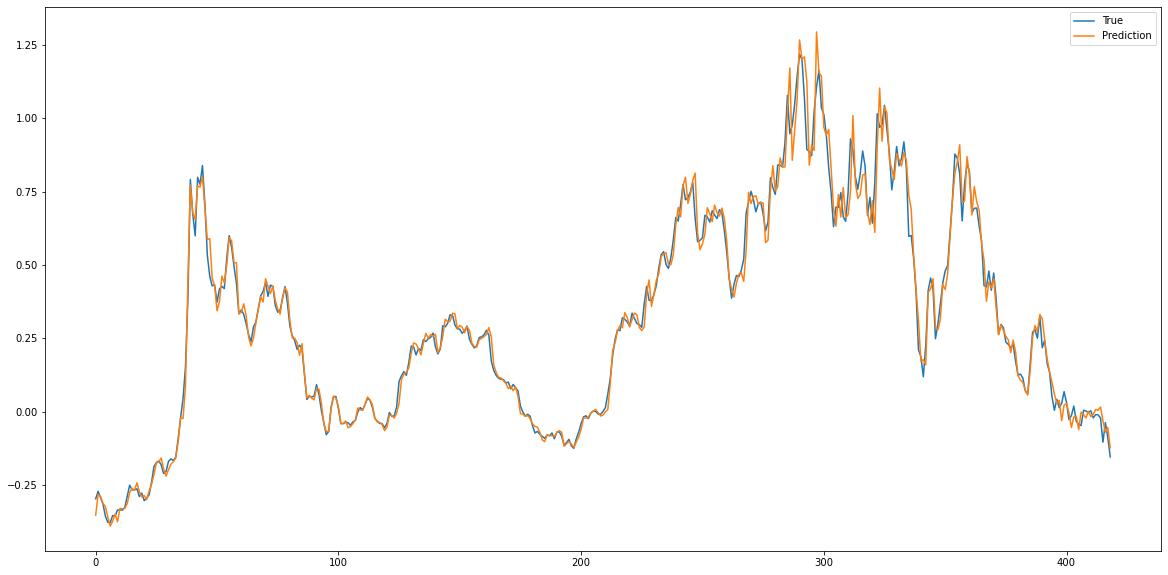

In [47]:
pred_plus = model.predict(x_test_plus)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test_plus, label='True')
ax.plot(pred_plus, label='Prediction')
ax.legend()
plt.show()

In [41]:
score = model.evaluate(x_test_plus, y_test_plus)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

14/14 [==============================] - 0s 5ms/step - loss: 0.0020


IndexError: list index out of range

In [46]:
logreg = LogisticRegression(max_iter = 5000).fit(x_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(x_train, y_train)))
print("훈련 세트 점수: {:.3f}".format(logreg.score(x_test_plus, y_test_plus)))


ValueError: Found array with dim 3. Estimator expected <= 2.